<a href="https://colab.research.google.com/github/VishanOberoi/DeepLearning/blob/main/PlantDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using a Convnet to predict if a plant is diseased or not

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive"

'2a815c4980a28248d970fec3cc1f63fe (1).pdf'   Data
 2a815c4980a28248d970fec3cc1f63fe.pdf	    'G038_3D-Printing_Exp 5.pdf'
'app-debug (1).apk'			     i033,28,30_ChatApp.apk
 app-debug.apk				     I033_MAD_TEE.pdf
'Chat Application-compressed (1).pdf'	    'MAD LABS.docx'
'Chat Application-compressed.pdf'	     Parsed_Not_Capuchinbird_Clips
 Classroom				     Plant_images_pianalytix
'Colab Notebooks'			    'Untitled spreadsheet.gsheet'
'Copy of All_ETS_Material_TC.gsheet'	    'Vishan Docs'


In [32]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
import keras
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.utils import img_to_array
from keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 

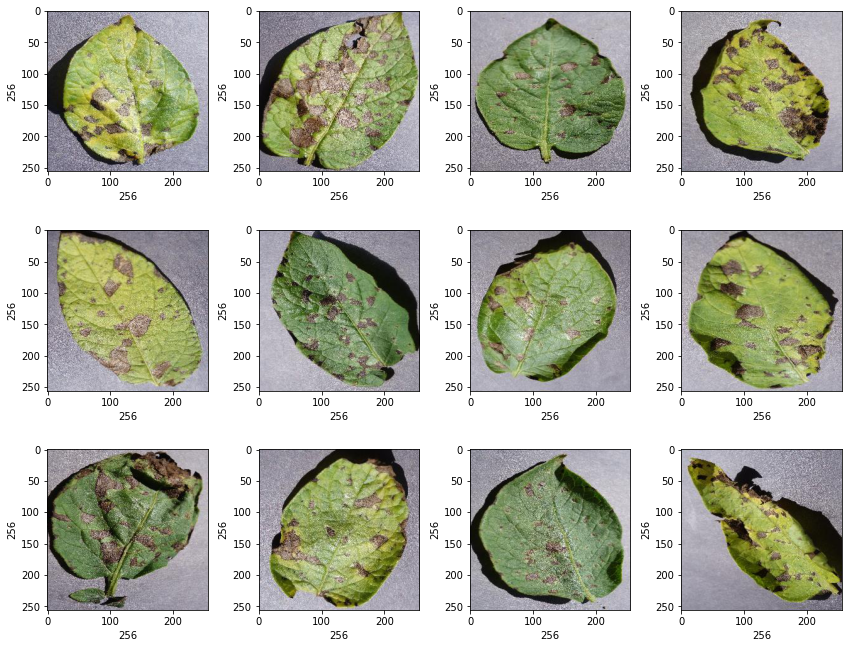

In [5]:
path = "/content/drive/My Drive/Plant_images_pianalytix/Potato___Early_blight"
def plot_few_imgs(path):
  plt.figure(figsize=(12,12))
  for i in range(1,13):
      plt.subplot(4,4,i)
      plt.tight_layout()
      rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
      plt.imshow(rand_img)
      plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
      plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image
plot_few_imgs(path)

In [6]:
#Convert imgs to array

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None



In [7]:
dir = "/content/drive/My Drive/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [8]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [9]:
#Image shape

image_list[0].shape


(256, 256, 3)

In [10]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [11]:
#Splitting

x_train, x_test, y_train, y_test = train_test_split(image_list,label_list, test_size=0.2, random_state = 10)

In [12]:
#Normalising
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [13]:
#OHE
y_train = to_categorical(y_train,3)
y_test = to_categorical(y_test,3)

In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 28224)             0         
                                                                 
 dense_8 (Dense)             (None, 8)                

In [24]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [25]:
#Splitting again for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [26]:
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
3/3 [==============================] - 2s 537ms/step - loss: 1.0703 - accuracy: 0.3673 - val_loss: 1.0304 - val_accuracy: 0.3649
Epoch 2/50
3/3 [==============================] - 0s 143ms/step - loss: 1.0398 - accuracy: 0.3367 - val_loss: 0.9923 - val_accuracy: 0.3784
Epoch 3/50
3/3 [==============================] - 0s 141ms/step - loss: 0.9956 - accuracy: 0.4252 - val_loss: 0.9645 - val_accuracy: 0.5946
Epoch 4/50
3/3 [==============================] - 0s 143ms/step - loss: 0.9540 - accuracy: 0.5748 - val_loss: 0.9247 - val_accuracy: 0.5676
Epoch 5/50
3/3 [==============================] - 0s 141ms/step - loss: 0.9212 - accuracy: 0.5442 - val_loss: 0.8899 - val_accuracy: 0.6081
Epoch 6/50
3/3 [==============================] - 0s 144ms/step - loss: 0.8733 - accuracy: 0.6190 - val_loss: 0.8528 - val_accuracy: 0.6622
Epoch 7/50
3/3 [==============================] - 0s 153ms/step - loss: 0.8369 - accuracy: 0.6497 - val_loss: 0.8224 - val_accuracy: 0.6622
Epoch 8/50
3/3 [====

#Tuning the model

## Adding one more conv and pooling layer
##Adding one more dense layer
##Reducing the learning rate
##Increasing the number of epochs

In [27]:

model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 85, 85, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 28, 28, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 16)      

In [28]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.001),metrics=['accuracy'])
#Splitting again for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)
epochs = 100
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/100
2/2 [==============================] - 2s 1s/step - loss: 1.0793 - accuracy: 0.3532 - val_loss: 1.0748 - val_accuracy: 0.2712
Epoch 2/100
2/2 [==============================] - 0s 191ms/step - loss: 1.0534 - accuracy: 0.3447 - val_loss: 1.0928 - val_accuracy: 0.2881
Epoch 3/100
2/2 [==============================] - 0s 192ms/step - loss: 1.0376 - accuracy: 0.3489 - val_loss: 1.0454 - val_accuracy: 0.2881
Epoch 4/100
2/2 [==============================] - 0s 197ms/step - loss: 1.0028 - accuracy: 0.3489 - val_loss: 1.0134 - val_accuracy: 0.2881
Epoch 5/100
2/2 [==============================] - 0s 191ms/step - loss: 0.9771 - accuracy: 0.3489 - val_loss: 0.9856 - val_accuracy: 0.2881
Epoch 6/100
2/2 [==============================] - 0s 199ms/step - loss: 0.9545 - accuracy: 0.3489 - val_loss: 0.9688 - val_accuracy: 0.2881
Epoch 7/100
2/2 [==============================] - 0s 193ms/step - loss: 0.9399 - accuracy: 0.3489 - val_loss: 0.9524 - val_accuracy: 0.2881
Epoch 8/100
2/2 

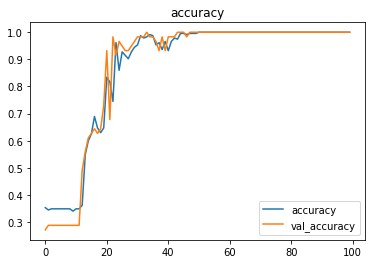

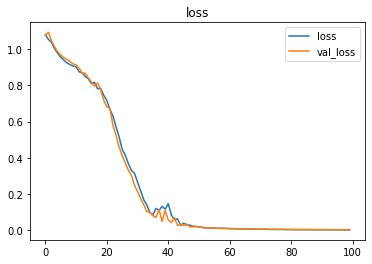

In [29]:
def plot_hist(model):
  evaluation = pd.DataFrame(model.history.history)
  evaluation[['accuracy', 'val_accuracy']].plot(title = 'accuracy')
  evaluation[['loss', 'val_loss']].plot(title = 'loss')
plot_hist(model)

#Applying early stopping

In [30]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))


model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.001),metrics=['accuracy'])
#Splitting again for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)
epochs = 100
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val), callbacks = [callback])

Epoch 1/100
2/2 [==============================] - 2s 999ms/step - loss: 1.0930 - accuracy: 0.4043 - val_loss: 1.0684 - val_accuracy: 0.3830
Epoch 2/100
2/2 [==============================] - 0s 130ms/step - loss: 1.0643 - accuracy: 0.3404 - val_loss: 1.0440 - val_accuracy: 0.3830
Epoch 3/100
2/2 [==============================] - 0s 130ms/step - loss: 1.0333 - accuracy: 0.3404 - val_loss: 1.0142 - val_accuracy: 0.3830
Epoch 4/100
2/2 [==============================] - 0s 136ms/step - loss: 1.0043 - accuracy: 0.3404 - val_loss: 0.9623 - val_accuracy: 0.3830
Epoch 5/100
2/2 [==============================] - 0s 133ms/step - loss: 0.9509 - accuracy: 0.3404 - val_loss: 0.9107 - val_accuracy: 0.3830
Epoch 6/100
2/2 [==============================] - 0s 130ms/step - loss: 0.9051 - accuracy: 0.3777 - val_loss: 0.8702 - val_accuracy: 0.4255
Epoch 7/100
2/2 [==============================] - 0s 136ms/step - loss: 0.8631 - accuracy: 0.4734 - val_loss: 0.8216 - val_accuracy: 0.6383
Epoch 8/100
2

#Saving the model

In [31]:
model.save("/content/drive/My Drive/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('/content/drive/My Drive/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/My Drive/plant_model_weights.h5')

In [33]:
#Testing the model for one example
y_pred = model.predict(x_test)


6/6 [==============================] - 1s 42ms/step


In [37]:
img = array_to_img(x_test[2])

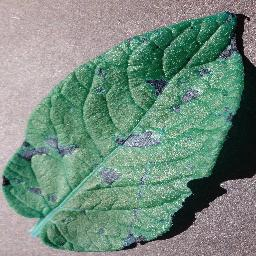

In [35]:
img

In [38]:
print("Originally : ",all_labels[np.argmax(y_test[2])])
print("Predicted : ",all_labels[np.argmax(y_pred[2])])

Originally :  Tomato-Bacterial_spot
Predicted :  Tomato-Bacterial_spot
